### Introduction to Binary Classification and Logistic Regression
Using data from the file COVID19 line list data.csv extract the columns age and death.   
Assume that 0 means the patient recovered and nonzero (a 1 or a date means the patient died). Ignore all other columns.   
Drop all rows that do not include an age or death flag and perform logistic regression on the age vs death.        
Calculate the accuracy of your prediction and make an ROC curve.   
Repeat the train/test split at least ten times to observe the variation in the accuracy.   
Compare the accuracy you get with:  
(a) 10 train/ten splits of entire data sets;   
(b) leave out one cross validation (use 10 splits); and    
(c) k-fold splits (use 10 splits). 

#### Using data from the file COVID19 line_list_data.csv extract the columns age and death.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('COVID19_line_list_data.csv', usecols=['age', 'death'])

In [2]:
print(df.sample(10))
print('- ' * 20)
print(df.info())

      age      death
895  42.0          0
615  20.0          0
735   NaN          0
653  41.0  2/22/2020
936  75.0          0
547  32.0          0
492  54.0          0
174  78.0          0
710  50.0          0
799   NaN          0
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   1085 non-null   object 
dtypes: float64(1), object(1)
memory usage: 17.1+ KB
None


#### Drop all rows that do not include an age or death flag

In [3]:
df.dropna(subset=['age', 'death'], inplace=True)

In [4]:
print(df.sample(10))
print('- ' * 20)
print(df.info())

       age      death
812   60.0          0
1079  24.0          0
581   61.0          0
726   31.0          0
651   58.0  2/24/2020
187   47.0          0
614   39.0          0
11    32.0          0
429    2.0          0
342   65.0          0
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   843 non-null    object 
dtypes: float64(1), object(1)
memory usage: 19.8+ KB
None


In [5]:
df['death'] = df['death'].apply(lambda cell: 0 if cell == '0' else 1)

In [6]:
print(df.sample(10))
print('- ' * 20)
print(df.info())

      age  death
455  56.0      0
368  55.0      0
44   50.0      0
493  37.0      0
667  55.0      0
914  71.0      0
516  56.0      0
395  85.0      0
795  33.0      0
242  45.0      0
- - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 1084
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     843 non-null    float64
 1   death   843 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 19.8 KB
None


### Simple EDA for the dataset

In [7]:
print(df['age'].describe())
print('- ' * 20)
print(df['death'].value_counts(normalize=True))

count    843.000000
mean      49.483689
std       18.255334
min        0.250000
25%       35.000000
50%       51.000000
75%       64.000000
max       96.000000
Name: age, dtype: float64
- - - - - - - - - - - - - - - - - - - - 
0    0.931198
1    0.068802
Name: death, dtype: float64


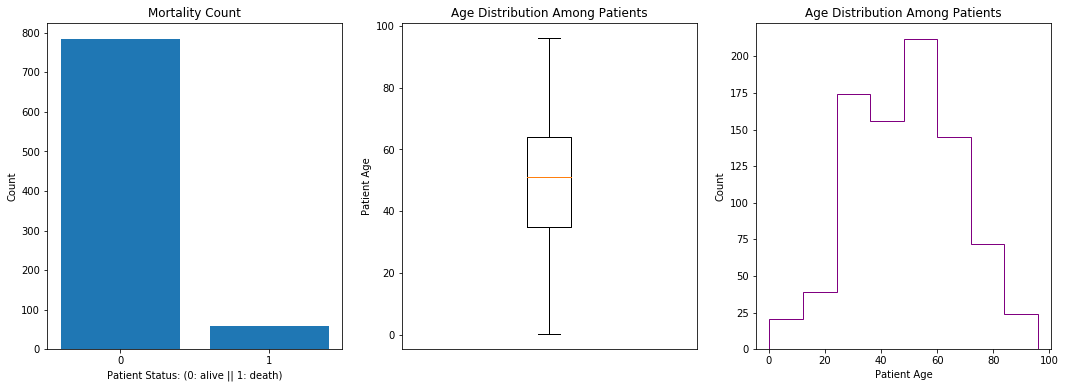

In [8]:
mortality = df['death'].value_counts()
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.bar(mortality.index, mortality)
ax0.set_xticks([0, 1])
ax0.set_title('Mortality Count')
ax0.set_xlabel('Patient Status: (0: alive || 1: death)')
ax0.set_ylabel('Count')
ax1.boxplot(df.age)
ax1.set_xticks([])
ax1.set_ylabel('Patient Age')
ax1.set_title('Age Distribution Among Patients')
ax2.hist(df.age, bins=8, histtype='step', color='purple')
ax2.set_xlabel('Patient Age')
ax2.set_ylabel('Count')
ax2.set_title('Age Distribution Among Patients')
fig.set_size_inches(18, 6)

#### Perform logistic regression on the age vs death 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve

# Split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(df[['age']], 
                                                    df['death'], 
                                                    test_size=.2, 
                                                    stratify=df['death'])

print('Training set shape:', X_train.shape, y_train.shape)
print('Testing  set shape:', X_test.shape,  y_test.shape)

train_ratio = y_train.value_counts(normalize=True)
test_ratio  = y_test.value_counts(normalize=True)

print('The training set has:\n\t Class 0 (alive) {:.1f}% and Class 1 (death) {:.1f}%'.\
      format(train_ratio[0] * 100, train_ratio[1] * 100))
print('The testing set has:\n\t Class 0 (alive) {:.1f}% and Class 1 (death) {:.1f}%'.\
      format(test_ratio[0] * 100, test_ratio[1] * 100))


print(X_train.sample(5))
print('- ' * 20)
print(y_train.sample(5))

# Train a logistic model to fit the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('\n\n>>>> Sucessful training the logistic regression model >>>>')

Training set shape: (674, 1) (674,)
Testing  set shape: (169, 1) (169,)
The training set has:
	 Class 0 (alive) 93.2% and Class 1 (death) 6.8%
The testing set has:
	 Class 0 (alive) 92.9% and Class 1 (death) 7.1%
       age
1012  22.0
918   75.0
459   56.0
499   62.0
556   40.0
- - - - - - - - - - - - - - - - - - - - 
514    0
765    0
188    0
667    0
193    0
Name: death, dtype: int64


>>>> Sucessful training the logistic regression model >>>>


#### Calculate the accuracy of your prediction and make an ROC curve.

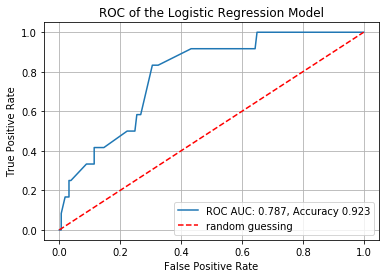

In [10]:
# Predict the label of the testing set X_test
y_scores = lr.predict_proba(X_test)
y_pred = lr.predict(X_test)

# Calculate the accuracy of the predictions
acc_score = accuracy_score(y_test, y_pred)

# Calculate the AUC of the ROC
roc_score = roc_auc_score(y_test, y_scores[:, 1])

# Plot the ROC curves
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
plt.plot(fpr, tpr, label='ROC AUC: {:.3f}, Accuracy {:.3f}'.format(roc_score, acc_score))
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of the Logistic Regression Model')
plt.grid()
plt.legend()
plt.show()

#print('The accuracy of the Logistic Regression model: {:.3f}'.format(acc_score))

### Compare the accuracy you get with 
#### (a) 10 train/ten splits of entire data sets

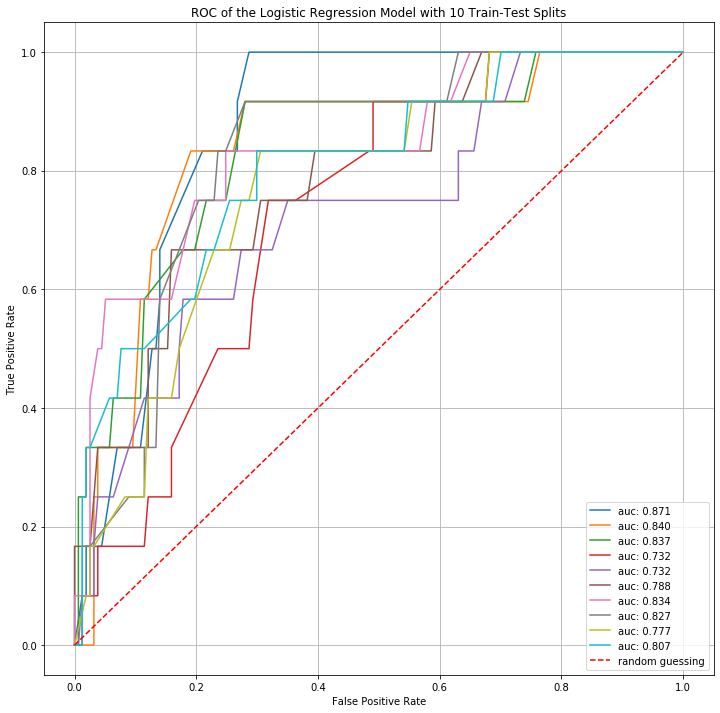

In [11]:
n_folds = 10
acc_list, auc_list = [], []

for k in range(n_folds):
    # Split the dataset for training and test
    X_train, X_test, y_train, y_test = train_test_split(df[['age']], 
                                                        df['death'], 
                                                        test_size=.2,
                                                        stratify=df['death'])
    # Train a logistic model to fit the training set
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # Predict the label of the testing set X_test
    y_scores = lr.predict_proba(X_test)
    y_pred = lr.predict(X_test)
    
    # Calculate the accuracy of the predictions
    acc_score = accuracy_score(y_test, y_pred)
    acc_list.append(acc_score)
    
    # Calculate the AUC of the ROC
    roc_score = roc_auc_score(y_test, y_scores[:, 1])
    auc_list.append(roc_score)
    
    # Plot the ROC curves
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:, 1])
    plt.plot(fpr, tpr, label='auc: {:.3f}'.format(roc_score))
    
plt.gcf().set_size_inches(12, 12)
plt.plot([0, 1], [0, 1], linestyle='dashed', color='red', label='random guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of the Logistic Regression Model with 10 Train-Test Splits')
plt.grid()
plt.legend(loc='lower right')
plt.show()

#### (b) leave out one cross validation (use 10 splits)

In [12]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
model = LogisticRegression()
cv_acc_list = cross_val_score(model,
                              X=df[['age']], 
                              y=df['death'],
                              scoring='accuracy',
                              cv=n_folds)

#### Use k-fold splits (use 10 splits)

In [13]:
# Use Statified KFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1111)
X = np.array(df.age).reshape(-1, 1)
y = np.array(df.death)
splits = skf.split(X, y)
skf_acc_list = []

for train_idx, test_idx in splits:
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test   = X[test_idx],  y[test_idx]
    
     # Train a logistic model to fit the training set
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # Predict the label of the testing set X_test
    y_pred = lr.predict(X_test)
    
    # Calculate the accuracy of the predictions
    acc_score = accuracy_score(y_test, y_pred)
    skf_acc_list.append(acc_score)
    

In [14]:
# Use KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1111)
splits = kf.split(X)
kf_acc_list = []

for train_idx, test_idx in splits:
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test   = X[test_idx],  y[test_idx]
    
     # Train a logistic model to fit the training set
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    
    # Predict the label of the testing set X_test
    y_pred = lr.predict(X_test)
    
    # Calculate the accuracy of the predictions
    acc_score = accuracy_score(y_test, y_pred)
    kf_acc_list.append(acc_score)

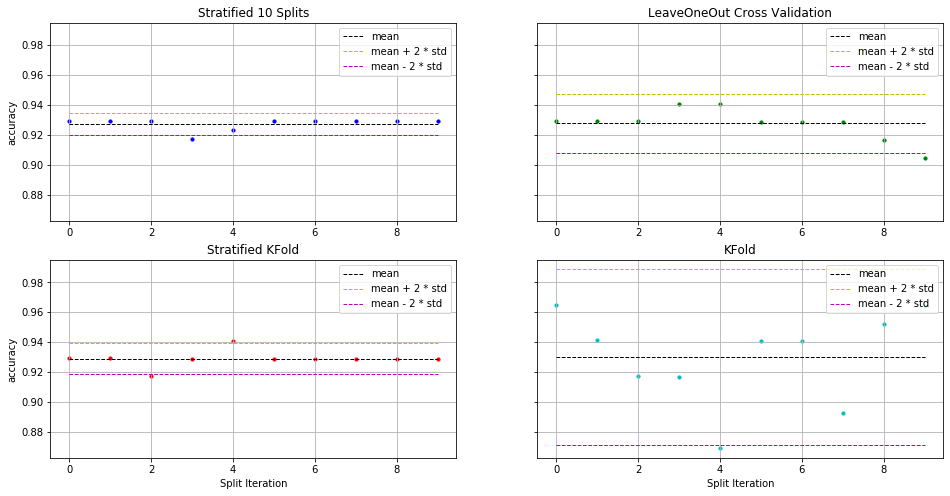

In [15]:
x_plot = np.arange(n_folds)
fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True)

acc_set = [acc_list, cv_acc_list, skf_acc_list, kf_acc_list]

titles = ['Stratified 10 Splits', 
          'LeaveOneOut Cross Validation',
          'Stratified KFold',
          'KFold']

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig.set_size_inches(16, 8)
for k in range(4):
    ax = axes[k // 2][k % 2]
    mean = np.mean(acc_set[k])
    std = np.std(acc_set[k])
    upper, lower = mean + 2 * std, mean - 2 * std
    
    ax.scatter(x_plot, acc_set[k], color=colors[k], s=10)
    ax.plot([0, n_folds - 1], [mean, mean],   colors[-1], 
            linewidth=1, linestyle='--', label='mean')
    ax.plot([0, n_folds - 1], [upper, upper], colors[-2], 
            linewidth=1, linestyle='--', label='mean + 2 * std')
    ax.plot([0, n_folds - 1], [lower, lower], colors[-3], 
            linewidth=1, linestyle='--', label='mean - 2 * std')
    ax.set_title(titles[k])
    
    if k // 2:
        ax.set_xlabel('Split Iteration')
    if k % 2 == 0:
        ax.set_ylabel('accuracy')
        
    ax.grid()
    ax.legend(loc='upper right')

plt.show()